# Proyecto individual de DA: Gaming

## Objetivo de negocio:
Grupo inversor está dispuesto a invertir en el desarrollo de nuevos productos, para ello, nos solicitar lo siguietne:
* Analizar el mercado de videojuegos.
* Identificar posibles nichos para desarrollar nuevos productos.
* Encontrar los insights y presentarlos.

### Preguntas a considerar y responder

* ¿Qué análisis podemos hacer del mercado actual?
* ¿Qué lineamientos generales deberá tener en cuenta el grupo inversor a la hora de determinar el primer juego de la empresa, para lograr aprovechar al máximo las tendencias del mercado, y así lograr el objetivo planteado?
* ¿Qué diferencias encontramos entre las distintas plataformas?
* ¿Qué relación podemos considerar en cuanto a la población e ingresos per cápita de los países? 
* ¿En qué regiones conviene enfocarse?
* ¿Podemos determinar algo con respecto a los rangos etarios u otras características demográficas?
* ¿Podemos estimar las ventas de los juegos actuales o al menos de una categoría? Shooters por ejemplo.

### Dataset a utilizar
| Archivos:
| ------ 
| Indicadores_del_desarrollo_humano_mundial Banco Mundial Indicadores de desarrollo humano. 
| Console_sales Reporte de ventas anuales de consolas. por marca y modelo. 
| Juegos en steam. Reporte con estadísticas de uso de juegos en Steam. Incluye recomendaciones  tiempo de uso, etc. 
| Video Games Sales Reporte de ventas por Video Juego y Plataforma. Incluye ranking y apertura por mercados (NA, EU, Japón y Global). 

## Fases de trabajo
1. Análisis exploratorio de datos para determinar las transformaciones de variables apropiadas, identificar patrones, y conclusiones.
2. Construir KPIs que se integren con el dashboard:
   1.  *Aumentar en un 10% las ventas por sector para el próximo trimestre.*
   2.  *Aumentar en un 10% la plataforma Steam.*
3. Construir un dashboard interactivo, funcional utilizando filtros adecuados.
4. Generar un readme.md que describa el desarrollo del proyecto y sus correspondientes conclusiones.
5. Narrar un storytelling en 10'.

> ## 1. Análisis exploratorio de los datos

#### Procesos a realizar:
1. Búsqueda de valores faltantes
2. Valores atípicos u outliers
3. Análisis univariado y bivariado
4. Registros duplicados
5. Conclusiones

#### 1.1. Importar Librería

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### 1.2. Creación del DataFrame 1_Indicadores_desarollo_humano_mundial

##### 1.2.1. Hoja: Data

In [67]:
df_1_1 = pd.read_excel('dataset/1_Indicadores_desarrollo_humano_mundial.xlsx', sheet_name='Data')

In [68]:
df_1_1

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Estados Unidos,USA,9632030,9632030,9632030,9632030,9632030,9632030,...,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,..
1,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Unión Europea,EUU,4384964.995117,4384984.995117,4385294.995117,4385644.995117,4385414.995117,4385434.995117,...,4386039.990234,4386021.99707,4383341.99707,4384062.192383,4384082.592773,4384131.577148,4384317.592773,4384317.592773,4384317.592773,..
2,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Japón,JPN,377800,377880,377890,377900,377910,377910,...,377950,377955,377960,377961.992188,377961.992188,377971.015625,377970,377970,377970,..
3,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Mundo,WLD,131606512.293178,131606902.668177,131607327.418178,131607728.793148,131605872.777079,131607830.159892,...,131805574.218215,131805826.432909,131803288.425096,132047813.110236,132046109.51847,132048793.077485,132036620.811879,132036620.811879,132025199.411879,..
4,"INB, método Atlas (US$ a precios actuales)",NY.GNP.ATLS.CD,Estados Unidos,USA,10147603801972.083984,10462204209818.1875,10732675433275.623047,11536447371063.488281,12740511355508.546875,13651359826763.560547,...,15154198695429.419922,15756881924473.791016,16560497008306.333984,17048936792646.988281,17776476297335.480469,18191395170920.964844,18467339419486.53125,19194752830167.121094,20636317813893.097656,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,Data from Database: Indicadores del desarrollo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
unique_series_name = df_1_1['Series Name'].unique()
unique_series_name 

array(['Superficie (kilómetros cuadrados)',
       'INB, método Atlas (US$ a precios actuales)',
       'INB per cápita, método Atlas (US$ a precios actuales)',
       'INB, PPA (a $ internacionales actuales)',
       'INB per cápita, PPA (a $ internacionales actuales)',
       'Esperanza de vida al nacer, total (años)',
       'Tasa de fertilidad, total (nacimientos por cada mujer)',
       'Prevalencia de uso de métodos anticonceptivos (% de mujeres entre 15 y 49 años)',
       'Nacimientos asistidos por personal de salud capacitado (% del total)',
       'Tasa de mortalidad, menores de 5 años (por cada 1.000)',
       'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)',
       'Inscripción escolar, nivel primario (% bruto)',
       'Inscripción escolar, nivel secundario (% bruto)',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)',
       'Área selvática  (kilómetros cuadrados)',
       'Áreas pr

**Consideraciones:**
Para este análisis se trabajará con los siguientes valores de Series Name:
* 'INB per cápita, PPA (a $ internacionales actuales)'
* 'Tasa de fertilidad, total (nacimientos por cada mujer)'
* 'Área selvática  (kilómetros cuadrados)'
* 'Crecimiento del PIB (% anual)'
* 'Tiempo necesario para iniciar un negocio (días)'
* 'Crédito interno proporcionado por el sector financiero (% del PIB)'
* 'Recaudación impositiva (% del PIB)'
* 'Índice de términos netos de intercambio (2000 = 100)'
* 'Deuda externa acumulada, total (DOD, US$ a precios actuales)'
* 'Migración neta'
* 'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)'
* 'Desempleo, total (% de la población activa total) (estimación modelado OIT)'
* 'Población activa, total'
* 'Población de 65 años de edad y más, total'
* 'Población entre 0 y 14 años de edad, total'
* 'Población entre 15 y 64 años de edad, total'

In [70]:
df_1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    234 non-null    object
 1   Series Code    232 non-null    object
 2   Country Name   232 non-null    object
 3   Country Code   232 non-null    object
 4   2000 [YR2000]  232 non-null    object
 5   2001 [YR2001]  232 non-null    object
 6   2002 [YR2002]  232 non-null    object
 7   2003 [YR2003]  232 non-null    object
 8   2004 [YR2004]  232 non-null    object
 9   2005 [YR2005]  232 non-null    object
 10  2006 [YR2006]  232 non-null    object
 11  2007 [YR2007]  232 non-null    object
 12  2008 [YR2008]  232 non-null    object
 13  2009 [YR2009]  232 non-null    object
 14  2010 [YR2010]  232 non-null    object
 15  2011 [YR2011]  232 non-null    object
 16  2012 [YR2012]  232 non-null    object
 17  2013 [YR2013]  232 non-null    object
 18  2014 [YR2014]  232 non-null   

In [71]:
df_1_1 = df_1_1.dropna()

In [72]:
df_1_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 231
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    232 non-null    object
 1   Series Code    232 non-null    object
 2   Country Name   232 non-null    object
 3   Country Code   232 non-null    object
 4   2000 [YR2000]  232 non-null    object
 5   2001 [YR2001]  232 non-null    object
 6   2002 [YR2002]  232 non-null    object
 7   2003 [YR2003]  232 non-null    object
 8   2004 [YR2004]  232 non-null    object
 9   2005 [YR2005]  232 non-null    object
 10  2006 [YR2006]  232 non-null    object
 11  2007 [YR2007]  232 non-null    object
 12  2008 [YR2008]  232 non-null    object
 13  2009 [YR2009]  232 non-null    object
 14  2010 [YR2010]  232 non-null    object
 15  2011 [YR2011]  232 non-null    object
 16  2012 [YR2012]  232 non-null    object
 17  2013 [YR2013]  232 non-null    object
 18  2014 [YR2014]  232 non-null    obje

##### 1.2.2. Hoja: Series - Metadata

In [73]:
df_1_2 = pd.read_excel('dataset/1_Indicadores_desarrollo_humano_mundial.xlsx', sheet_name='Series - Metadata')

In [74]:
df_1_2

,Code,License Type,Indicator Name,Short definition,Long definition,Source,Topic,Dataset,Periodicity,Base Period,Aggregation method,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,Other notes,License URL
0,AG.SRF.TOTL.K2,CC BY-4.0,Surface area (sq. km),NaN,"Surface area is a country's total area, includ...","Food and Agriculture Organization, electronic ...",Environment: Land use,NaN,Annual,NaN,Sum,Total land area includes inland water bodies s...,Total surface area is particularly important f...,The data are collected by the Food and Agricul...,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1,NY.GNP.ATLS.CD,CC BY-4.0,"GNI, Atlas method (current US$)",NaN,GNI (formerly GNP) is the sum of value added b...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Atl...,NaN,Annual,NaN,Gap-filled total,In calculating GNI and GNI per capita in U.S. ...,Because development encompasses many factors -...,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
2,NY.GNP.PCAP.CD,CC BY-4.0,"GNI per capita, Atlas method (current US$)",NaN,GNI per capita (formerly GNP per capita) is th...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Atl...,NaN,Annual,NaN,Weighted average,The World Bank uses Atlas method GNI per capit...,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
3,NY.GNP.MKTP.PP.CD,CC BY-4.0,"GNI, PPP (current international $)",NaN,This indicator provides values for gross natio...,"International Comparison Program, World Bank |...",Economic Policy & Debt: Purchasing power parity,NaN,Annual,NaN,Gap-filled total,"Typically, higher income countries have higher...",Because development encompasses many factors -...,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
4,NY.GNP.PCAP.PP.CD,CC BY-4.0,"GNI per capita, PPP (current international $)",NaN,This indicator provides per capita values for ...,"International Comparison Program, World Bank |...",Economic Policy & Debt: Purchasing power parity,NaN,Annual,NaN,Weighted average,"Typically, higher income countries have higher...",NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
5,SP.DYN.LE00.IN,CC BY-4.0,"Life expectancy at birth, total (years)",NaN,Life expectancy at birth indicates the number ...,(1) United Nations Population Division. World ...,Health: Mortality,NaN,Annual,NaN,Weighted average,Life expectancy at birth used here is the aver...,Mortality rates for different age groups (infa...,Annual data series from United Nations Populat...,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
6,SP.DYN.TFRT.IN,CC BY-4.0,"Fertility rate, total (births per woman)",NaN,Total fertility rate represents the number of ...,(1) United Nations Population Division. World ...,Health: Reproductive health,NaN,Annual,NaN,Weighted average,Total fertility rates are based on data on reg...,Reproductive health is a state of physical and...,Annual data series from United Nations Populat...,Relevance to gender indicator: it can indicate...,NaN,https://datacatalog.worldbank.org/public-licen...
7,SP.DYN.CONU.ZS,CC BY-4.0,"Contraceptive prevalence, any methods (% of wo...",NaN,Contraceptive prevalence rate is the percentag...,UNICEF's State of the World's Children and Chi...,Health: Reproductive health,NaN,Annual,NaN,Weighted average,Contraceptive prevalence reflects all methods ...,Reproductive health is a state of physical and...,NaN,Contraceptive prevalence amongst women of repr...,NaN,https://datacatalog.worldbank.org/public-licen...
8,SH.STA.BRTC.ZS,CC BY-4.0,Births attended by skilled health staff (% of ...,NaN,Births attended by skilled health staff are th...,"UNICEF, State of the World's Children, Childin...",Health: Reproductive health,NaN,Annual,NaN,Weighted average,NaN,Reproductive health is a state of physical and...,For the indicators that are from household sur...,Assistance by trained professional

In [75]:
df_1_2 = df_1_2.dropna(axis=1)


In [76]:
df_1_2.columns

Index(['Code', 'License Type', 'Indicator Name', 'Long definition', 'Source',
       'Topic', 'Periodicity', 'License URL'],
      dtype='object')

In [77]:
df_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Code             58 non-null     object
 1   License Type     58 non-null     object
 2   Indicator Name   58 non-null     object
 3   Long definition  58 non-null     object
 4   Source           58 non-null     object
 5   Topic            58 non-null     object
 6   Periodicity      58 non-null     object
 7   License URL      58 non-null     object
dtypes: object(8)
memory usage: 3.8+ KB


#### 1.3. Creación del DataFrame 2_Console_sales

In [78]:
df_2 = pd.read_excel('dataset/2_Console_sales.xlsx', sheet_name='Ventas anual')

In [79]:
df_2

,Year,Dato,Console,Company,Sales
0,2011,anual,Nintendo 3DS,Nintendo,12560000.0
1,2012,anual,Nintendo 3DS,Nintendo,13480000.0
2,2013,anual,Nintendo 3DS,Nintendo,14310000.0
3,2014,anual,Nintendo 3DS,Nintendo,9740000.0
4,2015,anual,Nintendo 3DS,Nintendo,7330000.0
...,...,...,...,...,...
79,2014,anual,Xbox360,Microsoft,2600000.0
80,2015,anual,Xbox360,Microsoft,930000.0
81,2016,anual,Xbox360,Microsoft,390000.0
82,2017,anual,Xbox360,Microsoft,60000.0


In [80]:
df_2.columns

Index(['Year', 'Dato', 'Console', 'Company', 'Sales'], dtype='object')

In [81]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     84 non-null     int64  
 1   Dato     84 non-null     object 
 2   Console  84 non-null     object 
 3   Company  84 non-null     object 
 4   Sales    84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB


#### 1.4. Creación del DataFrame 3_Juegos_steam

In [82]:
df_3 = pd.read_csv('dataset/3_Juegos_steam.csv')

In [83]:
df_3

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [84]:
df_3.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [85]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [86]:
df_3 = df_3.dropna()

In [87]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27061 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27061 non-null  int64  
 1   name              27061 non-null  object 
 2   release_date      27061 non-null  object 
 3   english           27061 non-null  int64  
 4   developer         27061 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27061 non-null  object 
 7   required_age      27061 non-null  int64  
 8   categories        27061 non-null  object 
 9   genres            27061 non-null  object 
 10  steamspy_tags     27061 non-null  object 
 11  achievements      27061 non-null  int64  
 12  positive_ratings  27061 non-null  int64  
 13  negative_ratings  27061 non-null  int64  
 14  average_playtime  27061 non-null  int64  
 15  median_playtime   27061 non-null  int64  
 16  owners            27061 non-null  object 
 17

Dado que todos los demas dataframe están en mayuscula al principio, se opta por hacer este dataframe tambien de la misma forma

In [88]:
df_3.columns = df_3.columns.str.replace('_', ' ').str.title().str.replace(' ', '_')
df_3.columns

Index(['Appid', 'Name', 'Release_Date', 'English', 'Developer', 'Publisher',
       'Platforms', 'Required_Age', 'Categories', 'Genres', 'Steamspy_Tags',
       'Achievements', 'Positive_Ratings', 'Negative_Ratings',
       'Average_Playtime', 'Median_Playtime', 'Owners', 'Price'],
      dtype='object')

Lo mismo se hace con df_1_2

In [91]:
df_1_2.columns = df_1_2.columns.str.replace('_', ' ').str.title().str.replace(' ', '_')
df_1_2.columns

Index(['Code', 'License_Type', 'Indicator_Name', 'Long_Definition', 'Source',
       'Topic', 'Periodicity', 'License_Url'],
      dtype='object')

Y similar con df_1_1

In [93]:
# Crear una función para limpiar los nombres de las columnas
def limpiar_nombre_columna(nombre):
    nombre_limpio = nombre.split(' [')[0]  # Eliminar corchetes y lo que está dentro
    nombre_limpio = nombre_limpio.replace(' ', '_')  # Reemplazar espacios por guiones
    return nombre_limpio

# Aplicar la función a los nombres de las columnas
df_1_1.columns = [limpiar_nombre_columna(col) for col in df_1_1.columns]

# Mostrar los nuevos nombres de las columnas
print(df_1_1.columns)

Index(['Series_Name', 'Series_Code', 'Country_Name', 'Country_Code', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')


#### 1.5. Creación del DataFrame 4_Video_games_sales

In [94]:
df_4 = pd.read_csv('dataset/4_Video_games_sales.csv')

In [95]:
df_4    

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,NaN,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_4.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [97]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         15848 non-null  float64
 6   EU_Sales         15520 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      15341 non-null  float64
 9   Global_Sales     15728 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [98]:
df_4['Critic_Score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16714     NaN
16715     NaN
16716     NaN
16717     NaN
16718     NaN
Name: Critic_Score, Length: 16719, dtype: float64

Se observa que existen columnas con casi la mitad de filas, por lo cual, no se considerarán. 
* Critic_Score
* Critic_Count
* User_Count
* User_Score
* Rating
* Developer

In [99]:
df_4.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [100]:
df_4 = df_4.drop(columns=['Critic_Score', 'Critic_Count', 'User_Count', 'User_Score', 'Rating', 'Developer'])

In [101]:
df_4 = df_4.dropna()

In [102]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12479 entries, 1 to 16717
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             12479 non-null  object 
 1   Platform         12479 non-null  object 
 2   Year_of_Release  12479 non-null  float64
 3   Genre            12479 non-null  object 
 4   Publisher        12479 non-null  object 
 5   NA_Sales         12479 non-null  float64
 6   EU_Sales         12479 non-null  float64
 7   JP_Sales         12479 non-null  float64
 8   Other_Sales      12479 non-null  float64
 9   Global_Sales     12479 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.0+ MB


#### 1.6. Observaciones

* Los tamaños de los DataFrame son pequeños y probablemente no existan problemas al trabarlos en un tablero de control.
* Se han eliminado algunas columnas por datos faltantes. Pero se resolverá en análisis posteriores si se eliminan más por irrelevancia.
* Se observa que el dataframe df_1_1 tiene una estructura rara. Se resolverá más adelante si se normaliza o se deja como está.
* Se ha observado cambiar los nombres de las columnas del df_3 para que queden todos iguales.

#### 2.1. Análisis de nulos

In [103]:
df_1_1.isnull().sum()

Series_Name     0
Series_Code     0
Country_Name    0
Country_Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
dtype: int64

In [104]:
df_1_2.isnull().sum()

Code               0
License_Type       0
Indicator_Name     0
Long_Definition    0
Source             0
Topic              0
Periodicity        0
License_Url        0
dtype: int64

In [105]:
df_2.isnull().sum()

Year       0
Dato       0
Console    0
Company    0
Sales      0
dtype: int64

In [106]:
df_3.isnull().sum()

Appid               0
Name                0
Release_Date        0
English             0
Developer           0
Publisher           0
Platforms           0
Required_Age        0
Categories          0
Genres              0
Steamspy_Tags       0
Achievements        0
Positive_Ratings    0
Negative_Ratings    0
Average_Playtime    0
Median_Playtime     0
Owners              0
Price               0
dtype: int64

In [107]:
df_4.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

#### 2.2. Normalizacion de valores

##### 2.2.1. Se eliminan columnas innecesarias

In [109]:
df_1_1 = df_1_1.drop(columns=["Series_Code", "Country_Name"])

##### 2.2.2. Normalización de valores dentro de la columna Series_Name en df_1_1

In [117]:
unique_country = df_1_1['Country_Code'].unique()

In [118]:
unique_country

array(['USA', 'EU', 'JPN', 'WLD'], dtype=object)

In [116]:
# Supongamos que df_1_1 es tu DataFrame
df_1_1['Country_Code'] = df_1_1['Country_Code'].replace('EUU', 'EU')

# Mostrar el DataFrame actualizado
print(unique_country)

['USA' 'EUU' 'JPN' 'WLD']


#### 2.3. Observaciones:
* No se observan nulos.

#### 3. Búsqueda de valores atípicos o outliers

Para ello, se procederá a graficar valores en histogramas y boxplots.

**Consideraciones**: existe la problemática de la línea del tiempo en el dataframe df_1_1. 

##### 3.1. Distribución de los valores en columnas numéricas

##### 3.1.1. df_1_1

**Consideraciones:**
Para este análisis se trabajará con los siguientes valores de Series Name:
* 'INB per cápita, PPA (a $ internacionales actuales)'
* 'Tasa de fertilidad, total (nacimientos por cada mujer)'
* 'Área selvática  (kilómetros cuadrados)'
* 'Crecimiento del PIB (% anual)'
* 'Tiempo necesario para iniciar un negocio (días)'
* 'Crédito interno proporcionado por el sector financiero (% del PIB)'
* 'Recaudación impositiva (% del PIB)'
* 'Índice de términos netos de intercambio (2000 = 100)'
* 'Migración neta'
* 'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)'
* 'Desempleo, total (% de la población activa total) (estimación modelado OIT)'
* 'Población activa, total'
* 'Población de 65 años de edad y más, total'
* 'Población entre 0 y 14 años de edad, total'
* 'Población entre 15 y 64 años de edad, total'

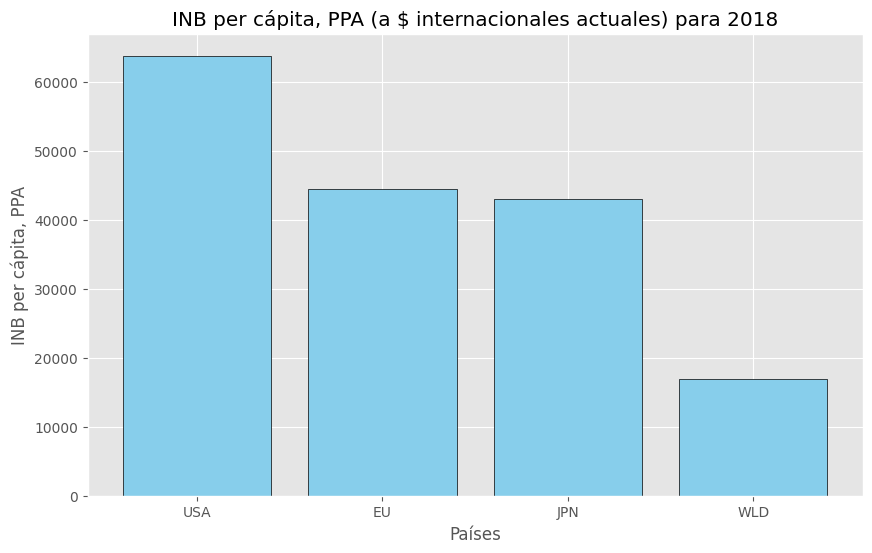

In [ ]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "INB per cápita, PPA (a $ internacionales actuales)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('INB per cápita, PPA (a $ internacionales actuales) para 2018')
plt.xlabel('Regiones')
plt.ylabel('INB per cápita, PPA')
plt.show()

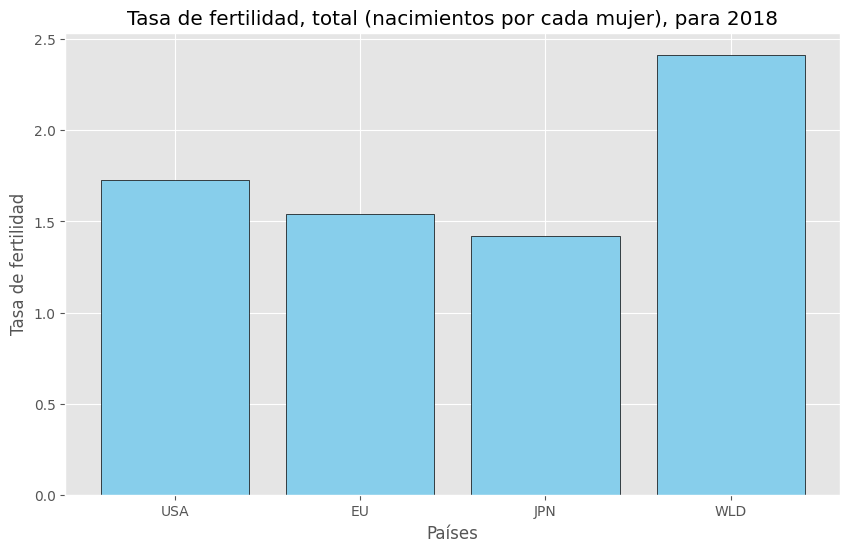

In [ ]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Tasa de fertilidad, total (nacimientos por cada mujer)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Tasa de fertilidad, total (nacimientos por cada mujer), para 2018')
plt.xlabel('Regiones')
plt.ylabel('Tasa de fertilidad')
plt.show()

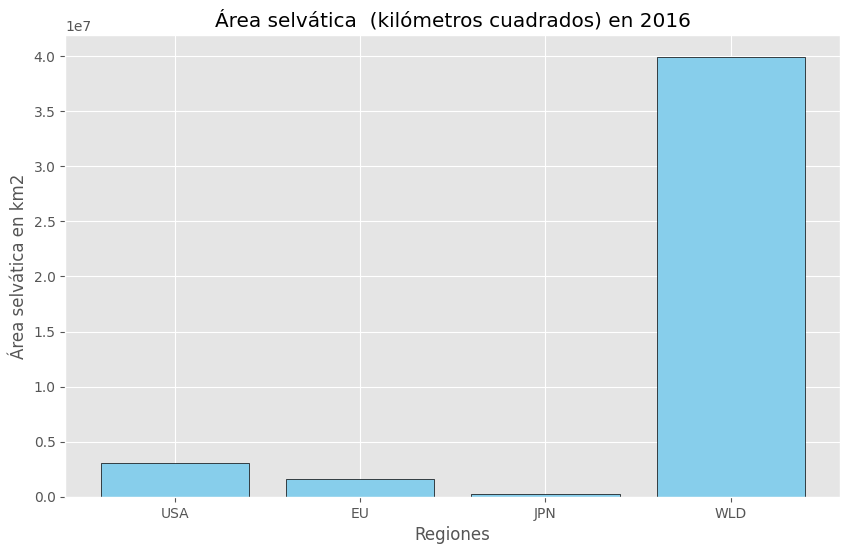

In [ ]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Área selvática  (kilómetros cuadrados)"]

# Seleccionar los primeros 4 valores de la columna "2016"
columna = filtro["2016"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Área selvática  (kilómetros cuadrados) en 2016')
plt.xlabel('Regiones')
plt.ylabel('Área selvática en km2')
plt.show()

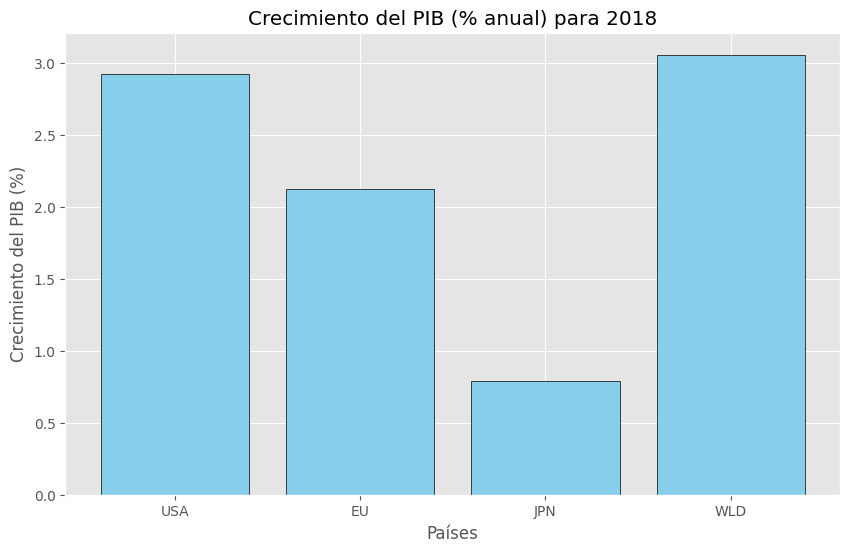

In [ ]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Crecimiento del PIB (% anual)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Crecimiento del PIB (% anual) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Crecimiento del PIB (%)')
plt.show()

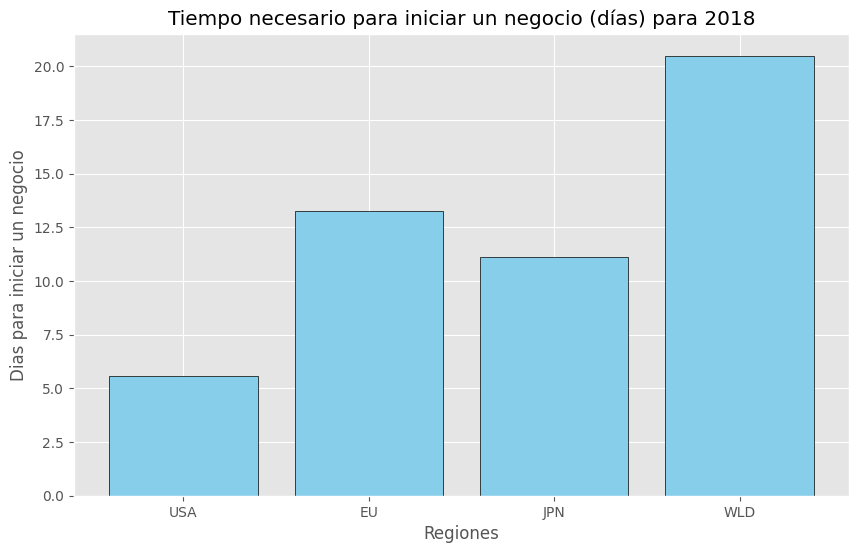

In [146]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Tiempo necesario para iniciar un negocio (días)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Tiempo necesario para iniciar un negocio (días) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Dias para iniciar un negocio')
plt.show()

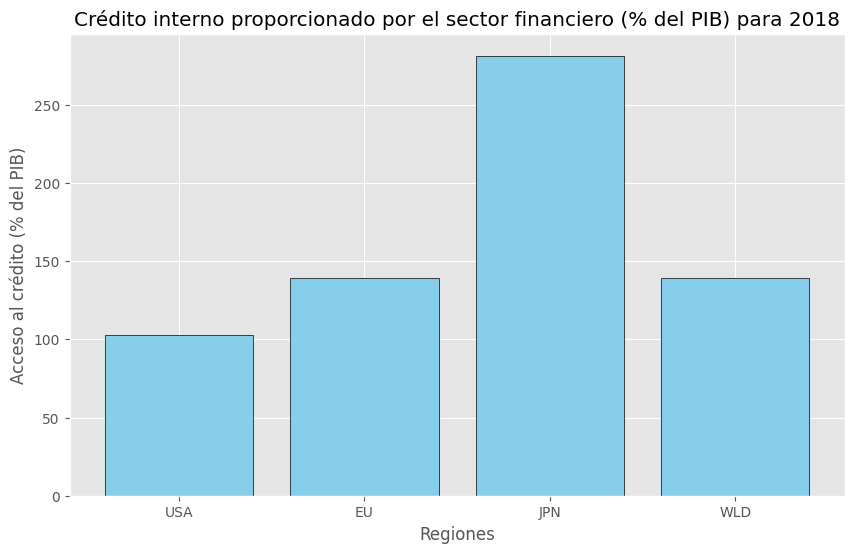

In [148]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Crédito interno proporcionado por el sector financiero (% del PIB)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Crédito interno proporcionado por el sector financiero (% del PIB) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Acceso al crédito (% del PIB)')
plt.show()

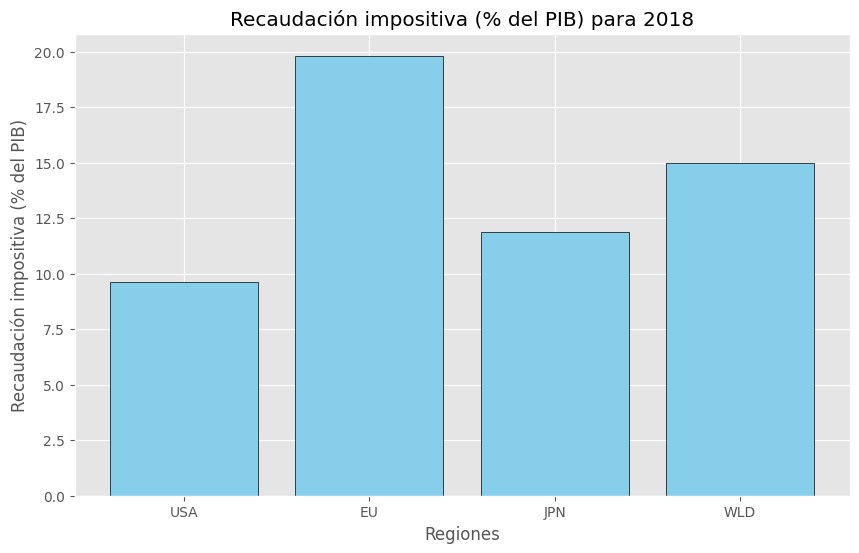

In [150]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Recaudación impositiva (% del PIB)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Recaudación impositiva (% del PIB) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Recaudación impositiva (% del PIB)')
plt.show()

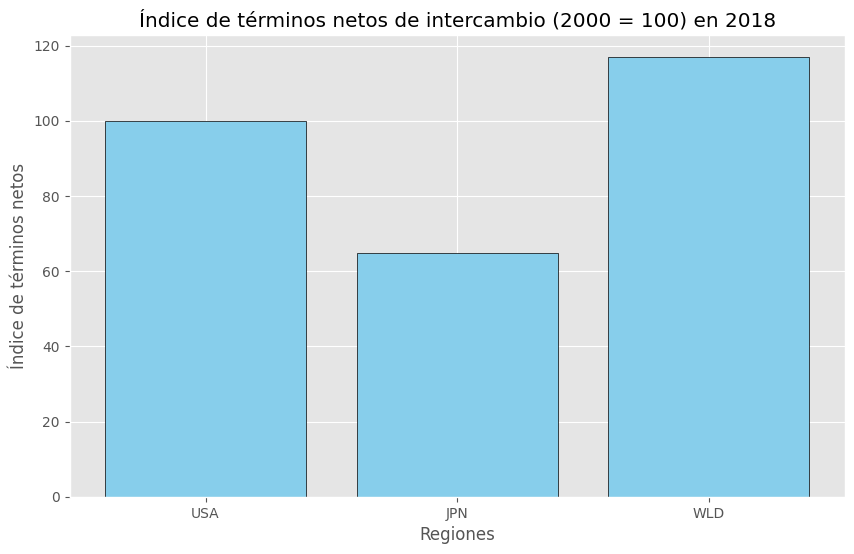

In [164]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Índice de términos netos de intercambio (2000 = 100)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[[0,2,3]]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Índice de términos netos de intercambio (2000 = 100) en 2018')
plt.xlabel('Regiones')
plt.ylabel('Índice de términos netos')
plt.show()

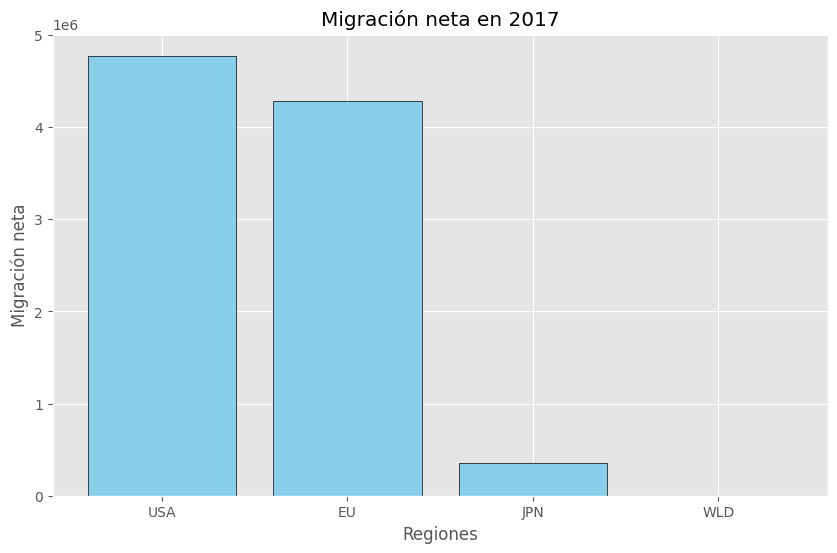

In [166]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Migración neta"]

# Seleccionar los primeros 4 valores de la columna "2017"
columna = filtro["2017"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Migración neta en 2017')
plt.xlabel('Regiones')
plt.ylabel('Migración neta')
plt.show()

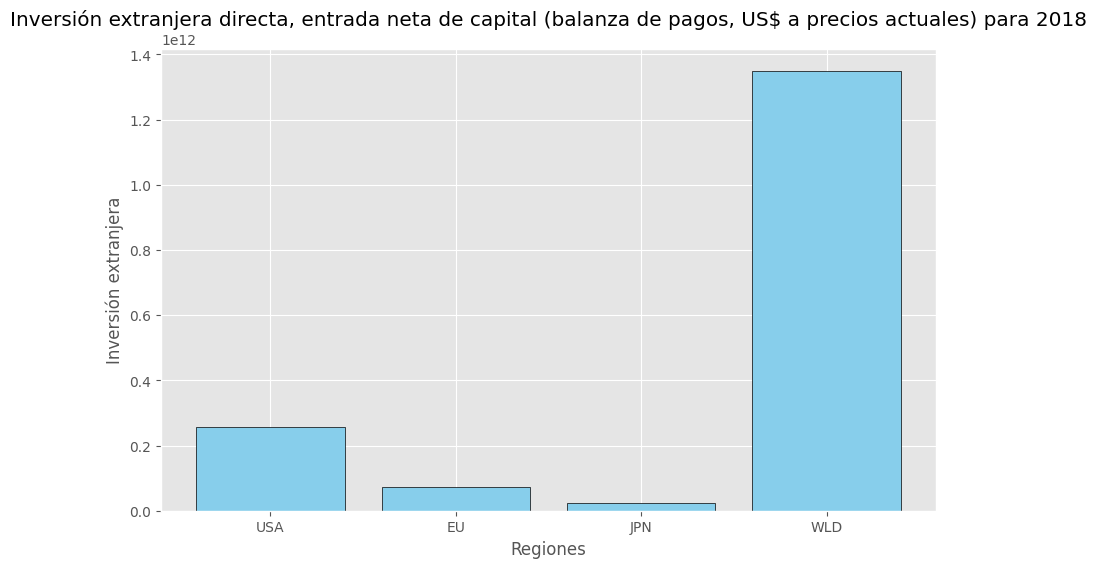

In [151]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Inversión extranjera')
plt.show()

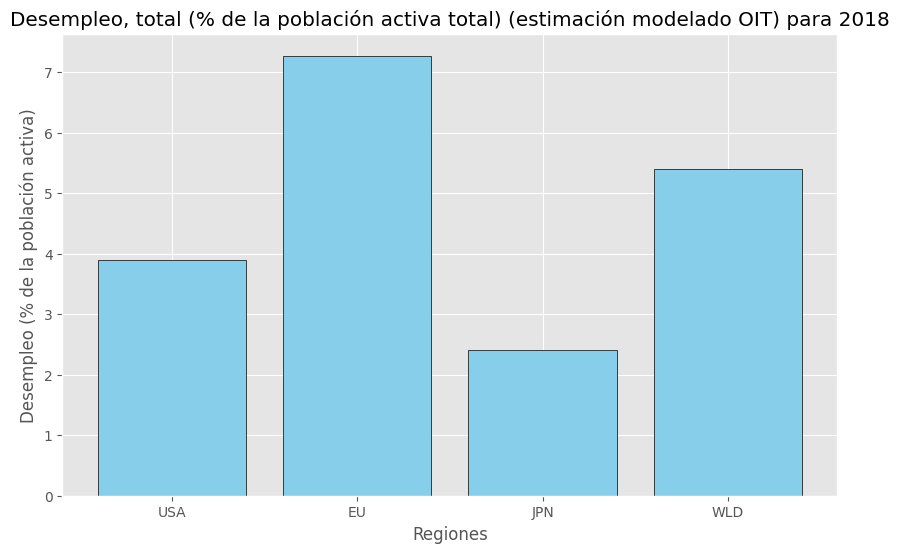

In [152]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Desempleo, total (% de la población activa total) (estimación modelado OIT)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Desempleo, total (% de la población activa total) (estimación modelado OIT) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Desempleo (% de la población activa)')
plt.show()

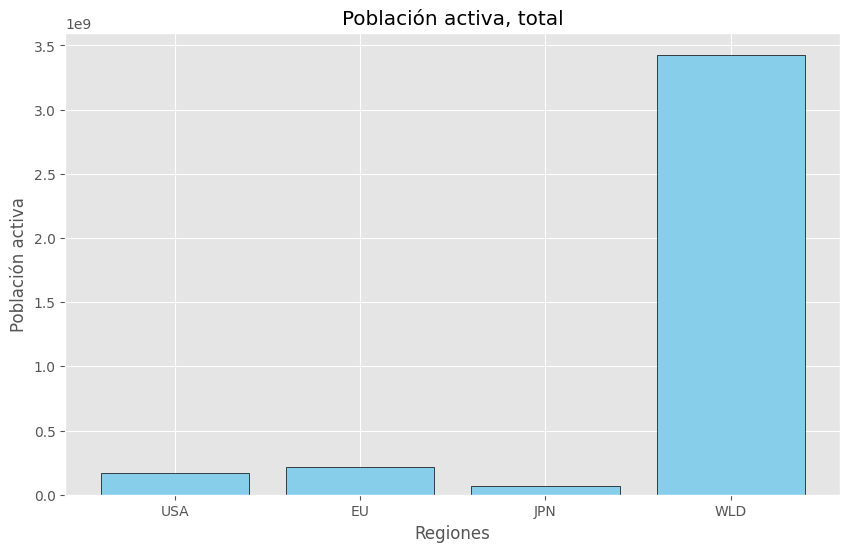

In [153]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Población activa, total"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Población activa, total')
plt.xlabel('Regiones')
plt.ylabel('Población activa')
plt.show()

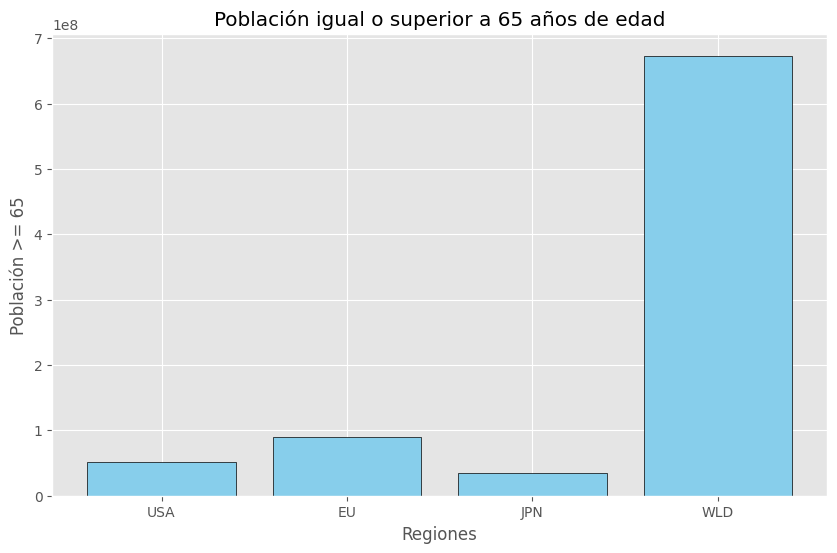

In [154]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Población de 65 años de edad y más, total"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Población igual o superior a 65 años de edad')
plt.xlabel('Regiones')
plt.ylabel('Población >= 65')
plt.show()

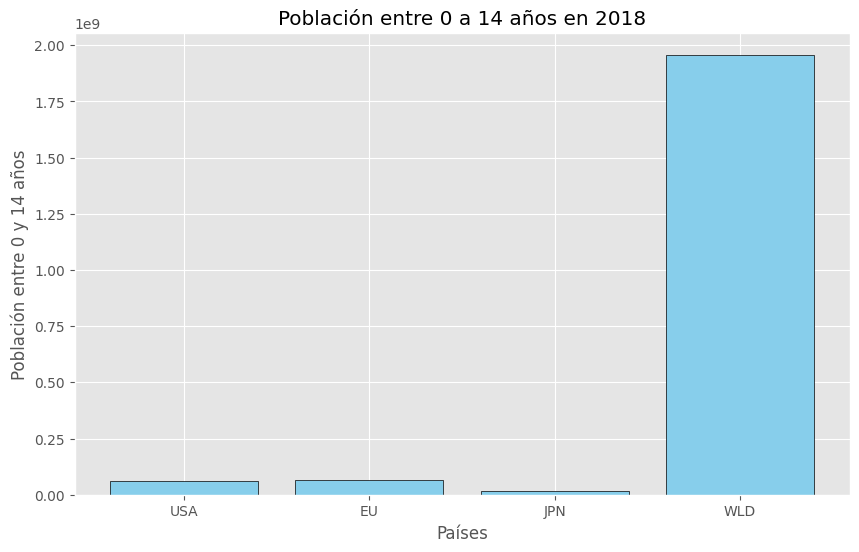

In [156]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Población entre 0 y 14 años de edad, total"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Población entre 0 a 14 años en 2018')
plt.xlabel('Países')
plt.ylabel('Población entre 0 y 14 años')
plt.show()

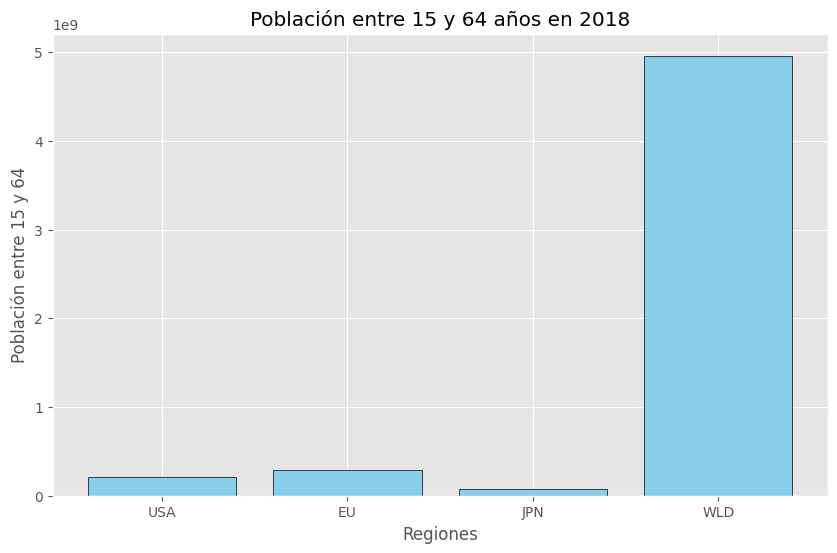

In [ ]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Población entre 15 y 64 años de edad, total"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Población entre 15 y 64 años en 2018')
plt.xlabel('Regiones')
plt.ylabel('Población entre 15 y 64 años')
plt.show()

Observaciones: no se observan valores atípicos o outliers

##### 3.1.2. df_2

In [176]:
# Mostrar todo el DataFrame df_2
pd.set_option('display.max_rows', None)  # Mostrar todas las filas

df_2


,Year,Dato,Console,Company,Sales
0,2011,anual,Nintendo 3DS,Nintendo,12560000.0
1,2012,anual,Nintendo 3DS,Nintendo,13480000.0
2,2013,anual,Nintendo 3DS,Nintendo,14310000.0
3,2014,anual,Nintendo 3DS,Nintendo,9740000.0
4,2015,anual,Nintendo 3DS,Nintendo,7330000.0
5,2016,anual,Nintendo 3DS,Nintendo,7590000.0
6,2017,anual,Nintendo 3DS,Nintendo,6190000.0
7,2018,anual,Nintendo 3DS,Nintendo,3500000.0
8,2008,anual,Nintendo DS,Nintendo,29470000.0
9,2009,anual,Nintendo DS,Nintendo,27280000.0


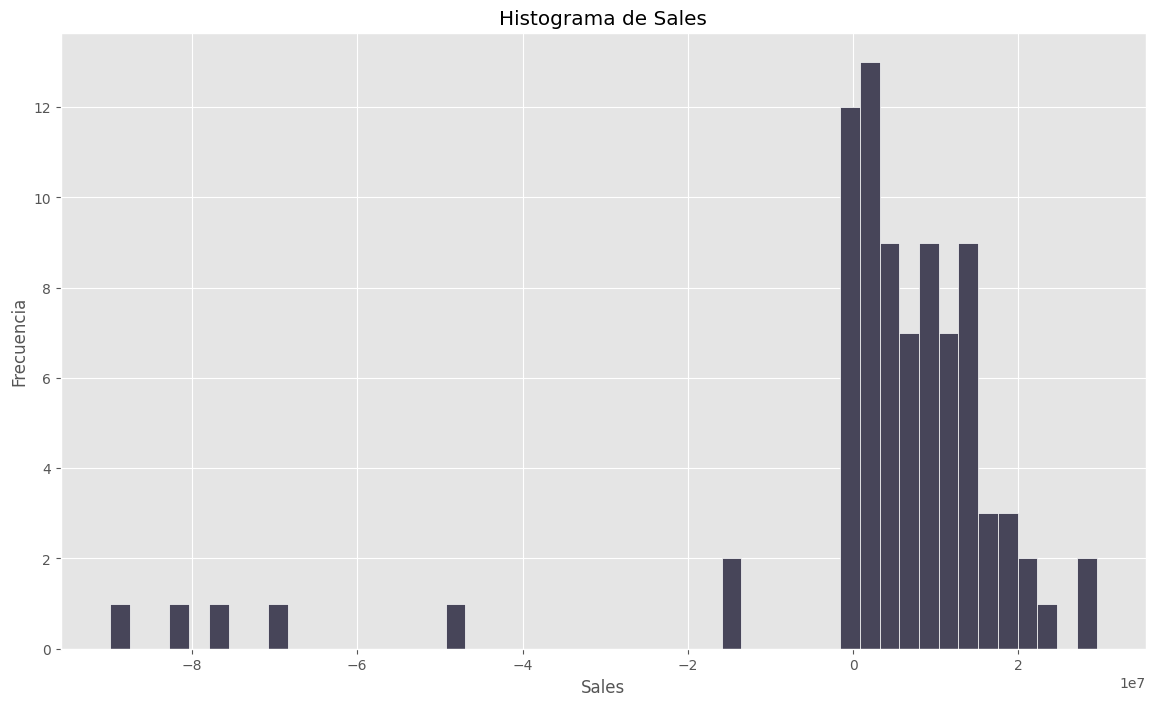

In [173]:
# Crear el histograma solo para 'Sales'
plt.figure(figsize=(14, 8))
plt.hist(df_2['Sales'], bins=50, color='#474559', edgecolor='white')
plt.title('Histograma de Sales')
plt.xlabel('Sales')
plt.ylabel('Frecuencia')
plt.show()

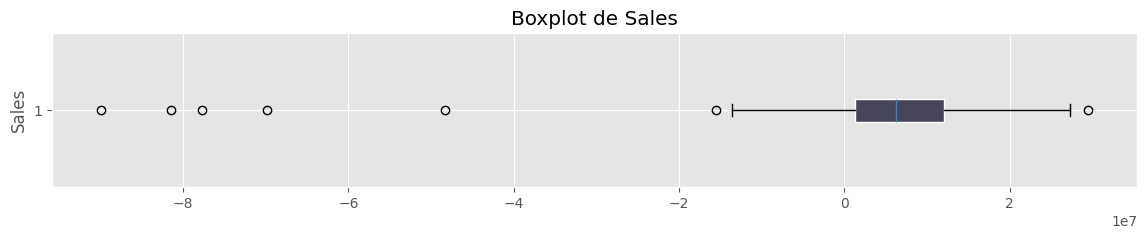

In [ ]:
# Crear el boxplot para 'Sales' en vertical
plt.figure(figsize=(14, 2))
plt.boxplot(df_2['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Sales')
plt.ylabel('Sales')
plt.show()

Observaciones: se observa que los valores negativos en la columna Sales corresponden a valores Out_of_use, y se eliminan por considerarse atípicos y que no aportan a un análisis de inversiones.

In [182]:
df_2 = df_2[df_2['Sales'] >= 0]

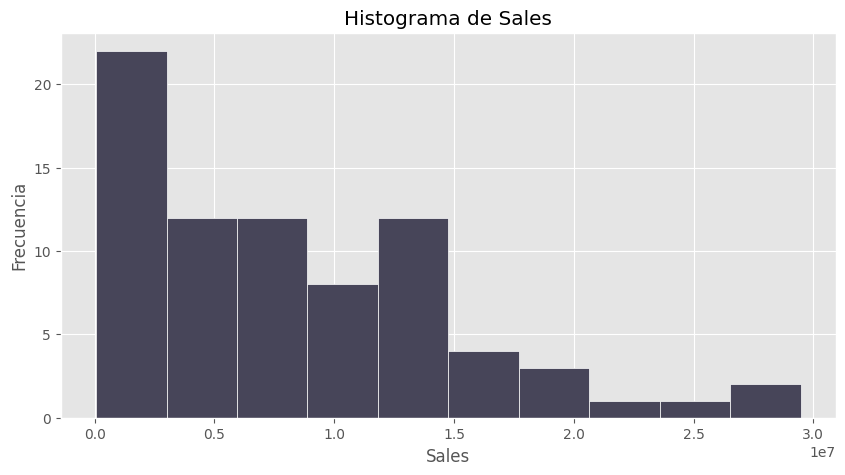

In [188]:
# Crear el histograma solo para 'Sales'
plt.figure(figsize=(10, 5))
plt.hist(df_2['Sales'], bins=10, color='#474559', edgecolor='white')
plt.title('Histograma de Sales')
plt.xlabel('Sales')
plt.ylabel('Frecuencia')
plt.show()

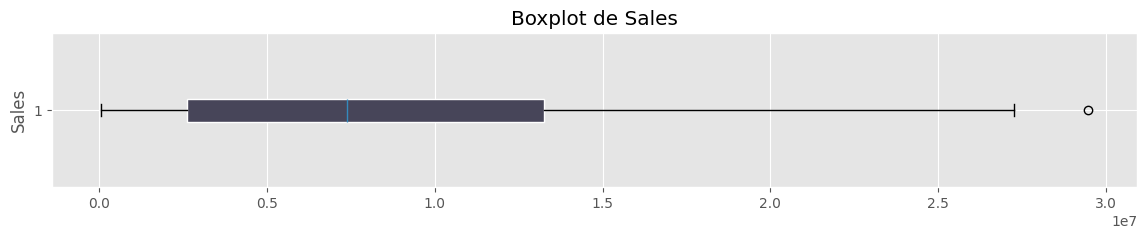

In [189]:
# Crear el boxplot para 'Sales' en vertical
plt.figure(figsize=(14, 2))
plt.boxplot(df_2['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Sales')
plt.ylabel('Sales')
plt.show()

Observaciones: se observa que la mediana de Sales es de 7 millones usd. Hasta 15 millones usd parece probable. Son pocos los casos donde se superan los 20 millones usd.

In [ ]:
df_3